In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
#base principal
base = pd.read_csv('Cities1.csv')
base

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


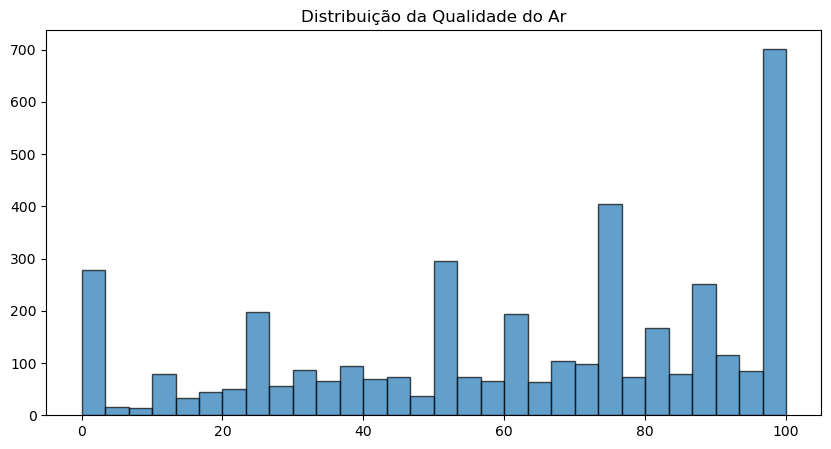

In [3]:
# Histograma para AirQuality
plt.figure(figsize=(10, 5))
plt.hist(base['AirQuality'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Qualidade do Ar')
plt.show()

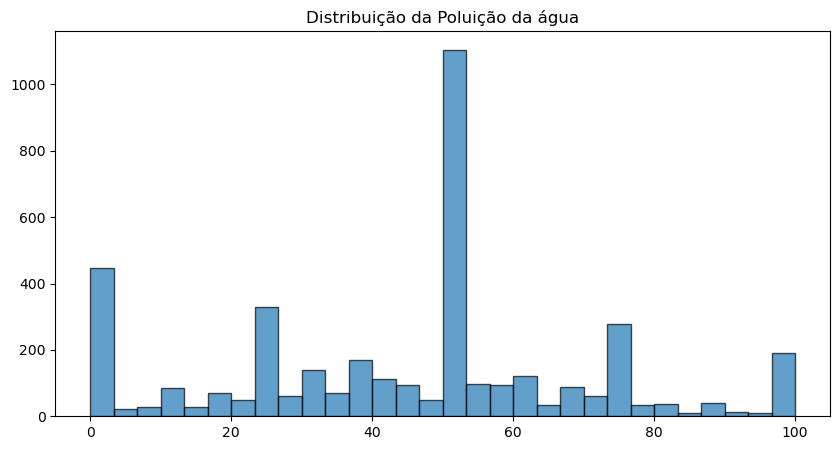

In [4]:
# Histograma para WaterPollution
plt.figure(figsize=(10, 5))
plt.hist(base['WaterPollution'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Poluição da água')
plt.show()

In [5]:
# Estatisticas descritivas gerais
print(base.describe())
print(base.isnull().sum())

        AirQuality  WaterPollution
count  3963.000000     3963.000000
mean     62.253452       44.635372
std      30.944753       25.663910
min       0.000000        0.000000
25%      37.686567       25.000000
50%      69.444444       50.000000
75%      87.500000       57.719393
max     100.000000      100.000000
City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64


In [6]:
# Calculo da mediana e da moda gerais
# Selecionando as Colunas de Interesse
colunas_selecionadas = ['AirQuality', 'WaterPollution']

# Cálculo Manual das Estatísticas Descritivas
for coluna in colunas_selecionadas:
  dados_coluna = base[coluna]

  # Mediana
  mediana = dados_coluna.median()

  # Moda
  moda = dados_coluna.mode()[0]


  # Imprimindo Estatísticas da Coluna Atual
  print(f"\nColuna: {coluna}")
  print(f"Mediana: {mediana:.2f}")
  print(f"Moda: {moda}")


Coluna: AirQuality
Mediana: 69.44
Moda: 100.0

Coluna: WaterPollution
Mediana: 50.00
Moda: 50.0


In [7]:
# Calcular o coeficiente de variação (CV) para AirQuality e WaterPollution
mean_airquality = base['AirQuality'].mean()
std_airquality = base['AirQuality'].std()
cv_airquality = (std_airquality / mean_airquality)*100

mean_waterpollution = base['WaterPollution'].mean()
std_waterpollution = base['WaterPollution'].std()
cv_waterpollution = (std_waterpollution / mean_waterpollution)*100

print(f"Coeficiente de Variação para AirQuality: {cv_airquality:.2f}%")
print(f"Coeficiente de Variação para WaterPollution: {cv_waterpollution:.2f}%")

Coeficiente de Variação para AirQuality: 49.71%
Coeficiente de Variação para WaterPollution: 57.50%


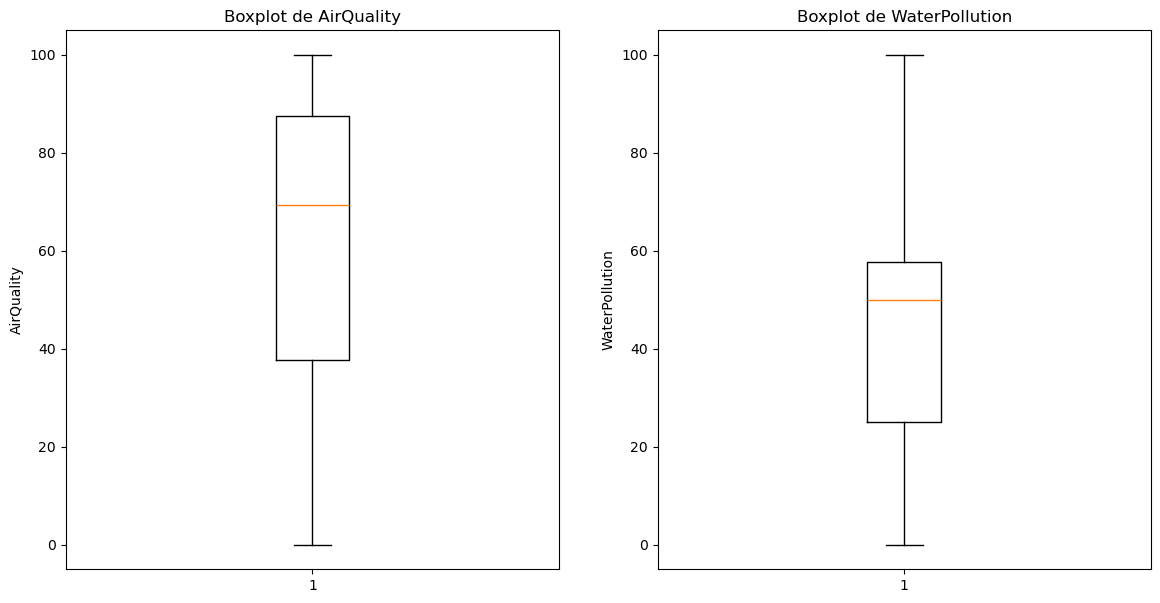

In [8]:
# Criar boxplots para AirQuality e WaterPOllution
plt.figure(figsize=(14, 7))

# Boxplot para AirQuality
plt.subplot(1, 2, 1)
plt.boxplot(base['AirQuality'])
plt.title('Boxplot de AirQuality')
plt.ylabel('AirQuality')

# Boxplot para WaterPollution
plt.subplot(1, 2, 2)
plt.boxplot(base['WaterPollution'])
plt.title('Boxplot de WaterPollution')
plt.ylabel('WaterPollution')

plt.show()

In [9]:
# Contar ocorrências de cada cidade
contagem_cidades = base['City'].value_counts()
print("Quantidade de cidades e suas aparições")
print(contagem_cidades)

# Filtrar cidades repetidas
cidades_repetidas = contagem_cidades[contagem_cidades > 1]

# Filtrar cidades não repetidas
cidades_nao_repetidas = contagem_cidades[contagem_cidades == 1]

# Exibir quantidade total de cidades repetidas e não repetidas
print(f"\nTotal de cidades repetidas: {cidades_repetidas.count()}")
print(f"Total de cidades não repetidas: {cidades_nao_repetidas.count()}")

Quantidade de cidades e suas aparições
City
Albany          4
Rochester       4
Alexandria      4
Jackson         4
Cambridge       4
               ..
Murfreesboro    1
Debrecen        1
Sierra Vista    1
Seward          1
Zamora city     1
Name: count, Length: 3796, dtype: int64

Total de cidades repetidas: 139
Total de cidades não repetidas: 3657


In [10]:
# Contar ocorrências de cada região
contagem_regioes = base['Region'].value_counts()
print("Quantidade de regiões e suas aparições")
print(contagem_regioes)

# Filtrar regiões repetidas
regioes_repetidas = contagem_regioes[contagem_regioes > 1]

# Filtrar regiões não repetidas
regioes_nao_repetidas = contagem_regioes[contagem_regioes == 1]

# Exibir quantidade total de regiões repetidas e não repetidas
print(f"\nTotal de regiões repetidas: {regioes_repetidas.count()}")
print(f"Total de regiões não repetidas: {regioes_nao_repetidas.count()}")

Quantidade de regiões e suas aparições
Region
England                  142
California               122
Texas                     51
Florida                   48
Ontario                   47
                        ... 
Mwanza Region              1
Durango                    1
Montevideo Department      1
Elbasan County             1
Los Rios Region            1
Name: count, Length: 1152, dtype: int64

Total de regiões repetidas: 436
Total de regiões não repetidas: 716


In [11]:
# Contagem de Ocorrências por País
contagem_paises = base['Country'].value_counts()

# Exibindo Contagem de Ocorrências
print("Quantidade de países e suas aparições:")
print(contagem_paises)

# Filtrando Países Repetidos e Não Repetidos
paises_repetidas = contagem_paises[contagem_paises > 1]
paises_nao_repetidos = contagem_paises[contagem_paises == 1]

# Exibindo Quantidade Total de Países
print(f"\nTotal de países repetidos: {paises_repetidas.count()}")
print(f"Total de países não repetidos: {paises_nao_repetidos.count()}")


Quantidade de países e suas aparições:
Country
United States of America      842
People's Republic of China    238
United Kingdom                170
Canada                        157
India                         154
                             ... 
El Salvador                     1
Suriname                        1
Haiti                           1
Togo                            1
Lesotho                         1
Name: count, Length: 177, dtype: int64

Total de países repetidos: 143
Total de países não repetidos: 34


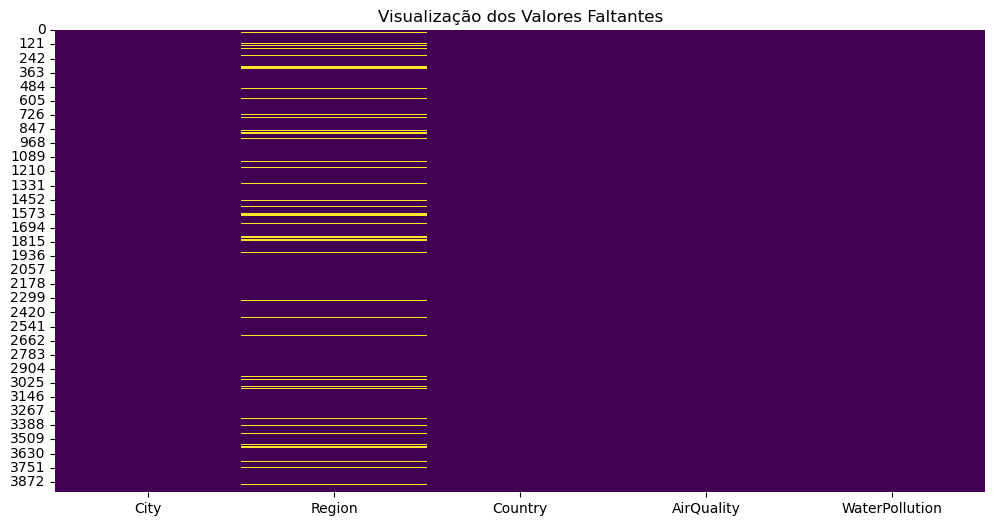

In [12]:
# Visualizar onde encontram-se os valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(base.isnull(), cbar=False, cmap='viridis')
plt.title('Visualização dos Valores Faltantes')
plt.show()

In [13]:
# Contar valores nulos por país
nulos_por_pais = base.isnull().groupby(base['Country']).sum()

# Filtrar para mostrar apenas os países com valores nulos
paises_com_nulos = nulos_por_pais[(nulos_por_pais > 0).any(axis=1)].copy()

# Adicionar uma coluna para a contagem total de nulos
paises_com_nulos.loc[:, 'TotalNulos'] = paises_com_nulos.sum(axis=1)

# Ordenar por total de nulos em ordem decrescente
paises_com_nulos_ordenado = paises_com_nulos.sort_values(by='TotalNulos', ascending=False)

# Remover a coluna TotalNulos se não for necessária
paises_com_nulos_ordenado = paises_com_nulos_ordenado.drop(columns='TotalNulos')

print("Países com valores nulos ordenados em ordem decrescente:")
print(paises_com_nulos_ordenado)

Países com valores nulos ordenados em ordem decrescente:
                  City  Region  Country  AirQuality  WaterPollution
Country                                                            
Czech Republic       0      57        0           0               0
France               0      42        0           0               0
Philippines          0      36        0           0               0
Finland              0      23        0           0               0
Greece               0      20        0           0               0
...                ...     ...      ...         ...             ...
Mozambique           0       1        0           0               0
Niger                0       1        0           0               0
Nigeria              0       1        0           0               0
Norway               0       1        0           0               0
Marshall Islands     0       1        0           0               0

[99 rows x 5 columns]


In [14]:
# Calculo da media total de nulos por pais
# Adicionar uma coluna para a contagem total de nulos por país
nulos_por_pais['TotalNulos'] = nulos_por_pais.sum(axis=1)

# Calcular a média total de valores nulos
media_total_nulos = nulos_por_pais['TotalNulos'].mean()

# Exibir o resultado
print("Média total de valores nulos por país:")
print(media_total_nulos)

Média total de valores nulos por país:
2.401129943502825


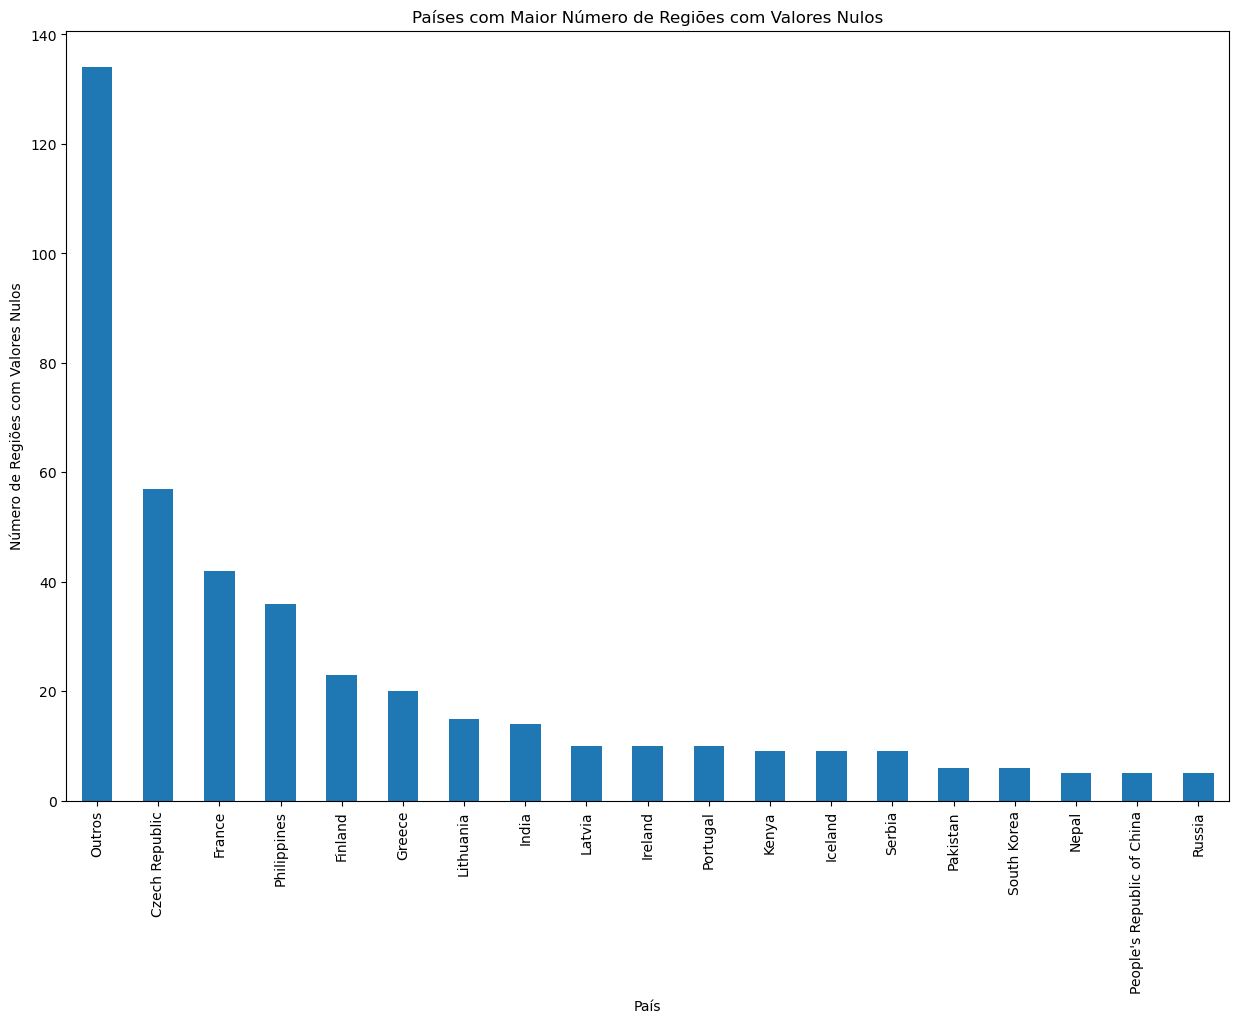

In [15]:
# Grafico para nulos por pais
# Contar valores nulos na coluna 'Region' por país
nulos_por_regiao = base['Region'].isnull().groupby(base['Country']).sum()

# Filtrar para mostrar apenas os países com valores nulos
paises_com_nulos = nulos_por_regiao[nulos_por_regiao > 0].copy()

# Ordenar por total de nulos em ordem decrescente
paises_com_nulos_ordenado = paises_com_nulos.sort_values(ascending=False)

# Definir um limite para o número de ocorrências abaixo do qual os países serão agrupados em "Outros"
limite = 5

# Identificar os países com valores nulos abaixo do limite
pouco_frequentes = paises_com_nulos_ordenado[paises_com_nulos_ordenado < limite].index

# Substituir esses países por "Outros" na série original
paises_com_nulos_ordenado = paises_com_nulos_ordenado.reset_index()
paises_com_nulos_ordenado['Country'] = paises_com_nulos_ordenado['Country'].apply(lambda x: 'Outros' if x in pouco_frequentes else x)

# Agrupar os dados novamente para contabilizar "Outros"
paises_com_nulos_agrupado = paises_com_nulos_ordenado.groupby('Country')['Region'].sum()

# Ordenar novamente por total de nulos em ordem decrescente
paises_com_nulos_agrupado = paises_com_nulos_agrupado.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(15, 10))
paises_com_nulos_agrupado.plot(kind='bar')
plt.title('Países com Maior Número de Regiões com Valores Nulos')
plt.xlabel('País')
plt.ylabel('Número de Regiões com Valores Nulos')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Calculo de desvio padrão e coeficiente de variação dos valores nulos
media_nulos = paises_com_nulos.mean()
desviop_nulos = paises_com_nulos.std()
CV_nulos = (desviop_nulos / media_nulos) * 100

print("O desvio pdrão dos valores nulos é de:")
print(f"{desviop_nulos}%")
print("O coeficiente de variação dos valores nulos é de:")
print(f"{CV_nulos:.2f}%")

O desvio pdrão dos valores nulos é de:
8.34125782769065%
O coeficiente de variação dos valores nulos é de:
194.30%


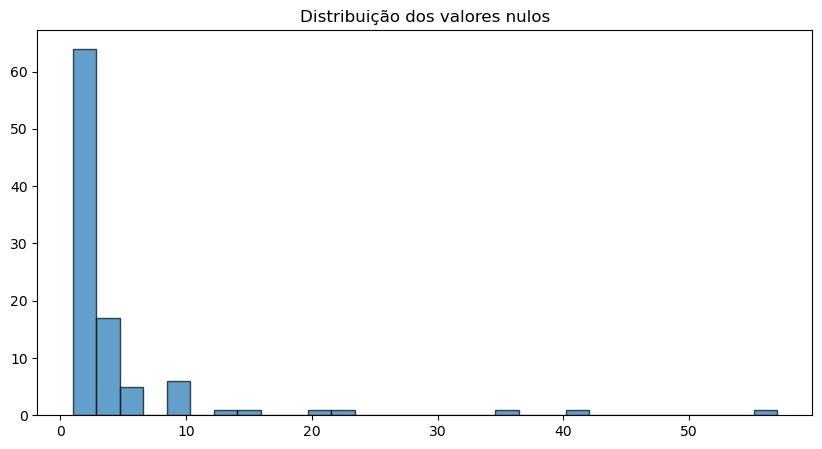

In [18]:
# Histograma dos valores nulos
plt.figure(figsize=(10, 5))
plt.hist(paises_com_nulos, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição dos valores nulos')
plt.show()

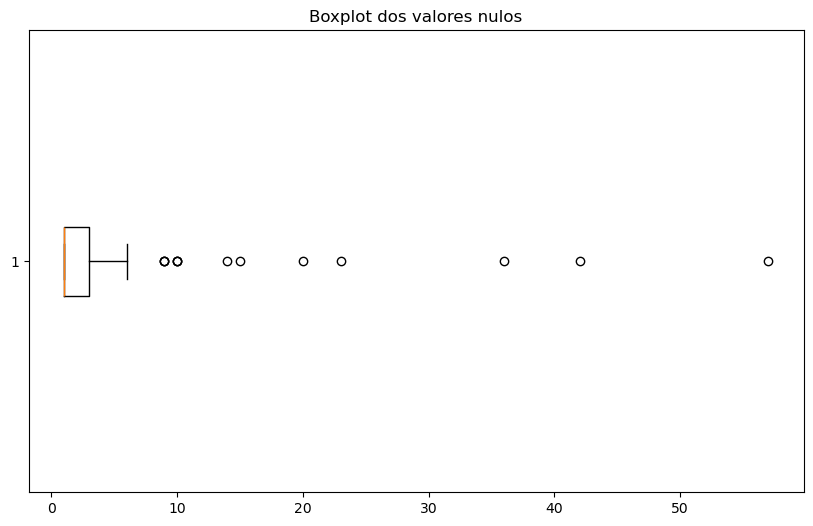

In [19]:
# Criar boxplot dos valores nulos
plt.figure(figsize=(10, 6))
plt.boxplot(paises_com_nulos, vert=False)
plt.title('Boxplot dos valores nulos')
plt.show()

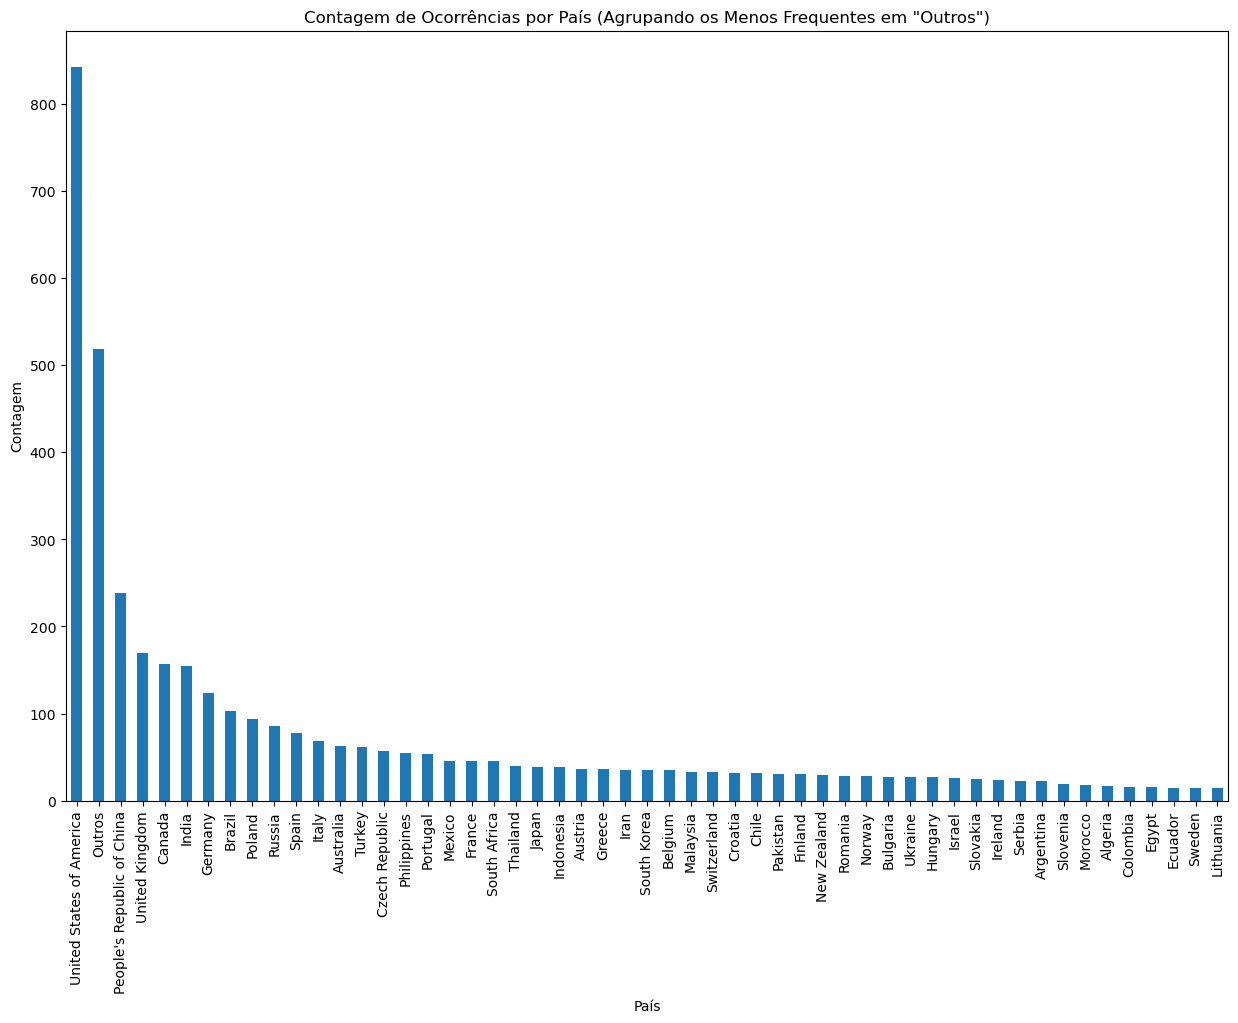

In [20]:
# Grafico para quantidade de ocorrências de cada país
contagem_pais = base['Country'].value_counts()

# Definir um limite para o número de ocorrências abaixo do qual os países serão agrupados em "Outros"
limite = 15

# Criar uma máscara booleana para países com ocorrências abaixo do limite
pouco_frequentes = contagem_pais[contagem_pais < limite].index

# Substituir esses países por "Outros" na coluna original
base['Country_agrupado'] = base['Country'].apply(lambda x: 'Outros' if x in pouco_frequentes else x)

# Recontar as ocorrências no novo agrupamento
contagem_pais_agrupado = base['Country_agrupado'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(15, 10))
contagem_pais_agrupado.plot(kind='bar')
plt.title('Contagem de Ocorrências por País (Agrupando os Menos Frequentes em "Outros")')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Calcular a média total de aparições de cada país
media_total_aparicoes = contagem_pais.mean()

print("Média total de aparições por país:")
print(media_total_aparicoes)


Média total de aparições por país:
22.389830508474578


In [22]:
# Calcula o desvio padrão da quantidade de aparições de cada país
print("O desvio padrão da quantidade de vezes que cada pais aparece é de:")
print(contagem_pais.std())


O desvio padrão da quantidade de vezes que cada pais aparece é de:
69.92642650147775


In [23]:
# Calcula o Coeficiente de Variação para a quantidade de aparições de cada país
media_aparicoes = contagem_pais.mean()
desviop_aparicoes = contagem_pais.std()
CV_aparicoes = (desviop_aparicoes / media_aparicoes) * 100

print("O coeficiente de variação da quantidade de aparições é de:")
print(f"{CV_aparicoes:.2f}%")

O coeficiente de variação da quantidade de aparições é de:
312.31%


In [24]:
# Exibe a quantidade de aparições de cada país 
print(contagem_pais)

Country
United States of America      842
People's Republic of China    238
United Kingdom                170
Canada                        157
India                         154
                             ... 
El Salvador                     1
Suriname                        1
Haiti                           1
Togo                            1
Lesotho                         1
Name: count, Length: 177, dtype: int64


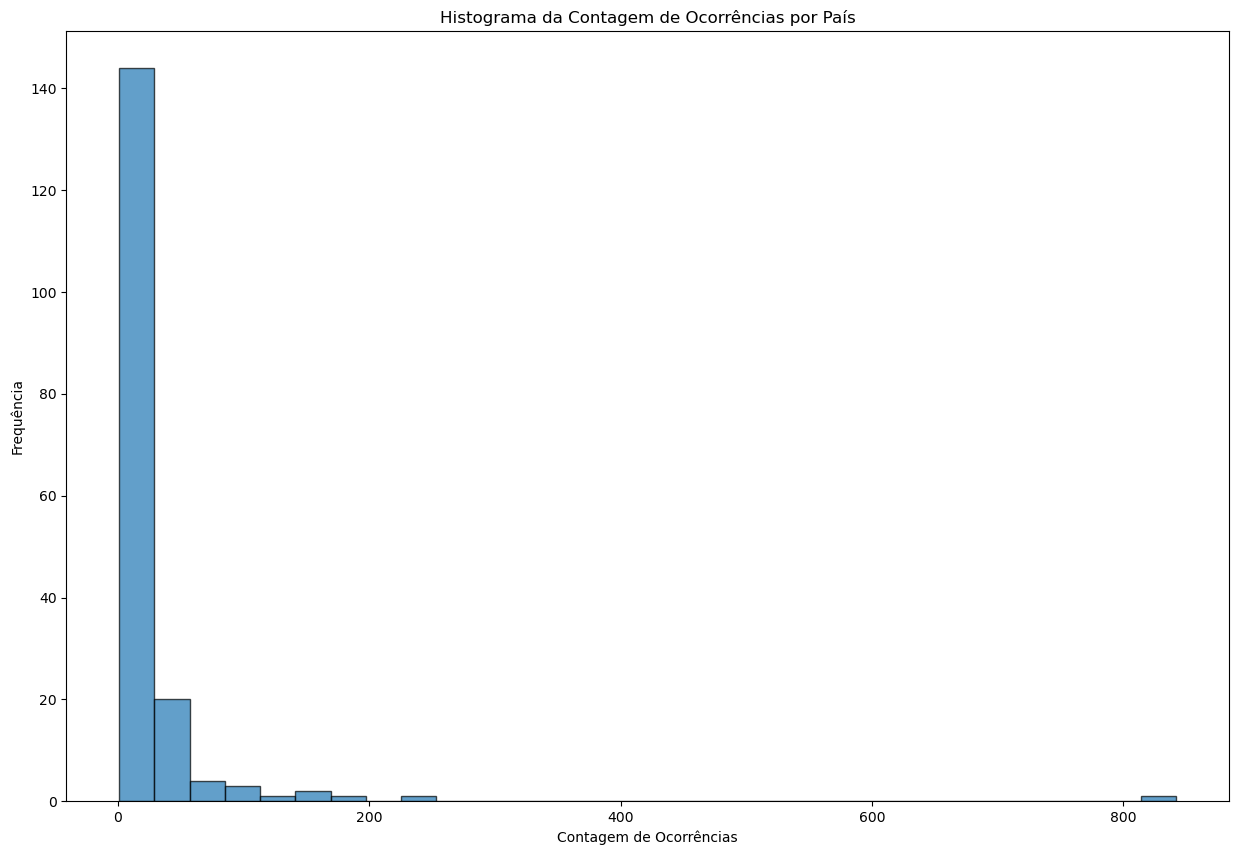

In [25]:
# Histograma das contagens de aparições por país
plt.figure(figsize=(15, 10))
plt.hist(contagem_pais, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma da Contagem de Ocorrências por País')
plt.xlabel('Contagem de Ocorrências')
plt.ylabel('Frequência')
plt.show()


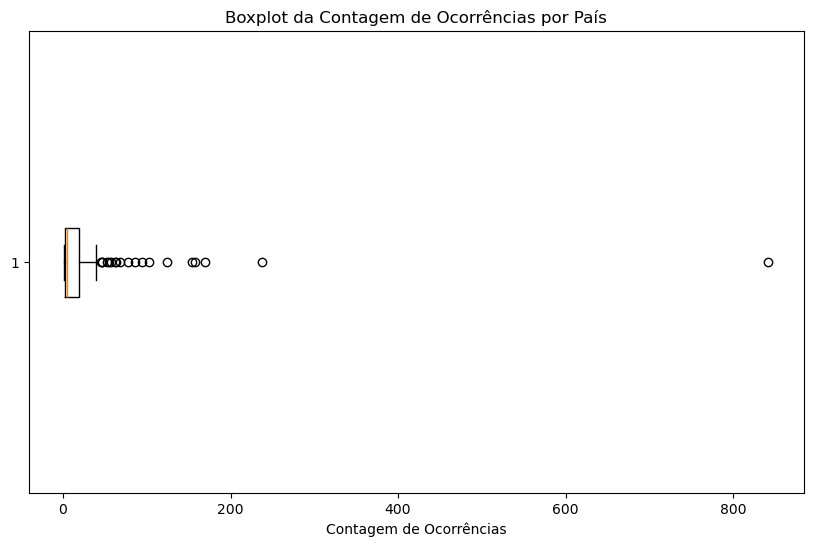

In [26]:
# Criar boxplot das contagens de aparições por país
plt.figure(figsize=(10, 6))
plt.boxplot(contagem_pais, vert=False)
plt.title('Boxplot da Contagem de Ocorrências por País')
plt.xlabel('Contagem de Ocorrências')
plt.show()

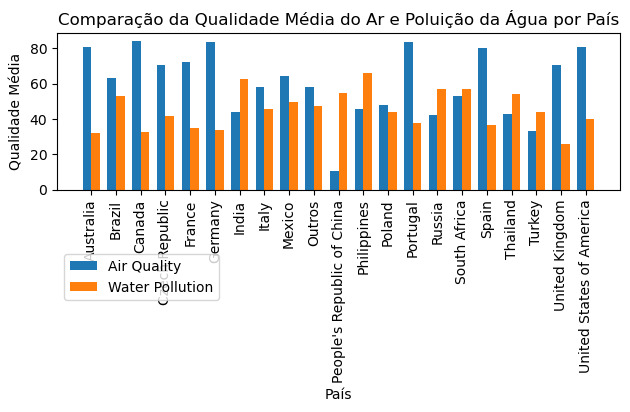

In [27]:
# Calcula e exibe a media da poluição da água e qualidade do ar por país e exibe o grafico
contagem_pais = base['Country'].value_counts()

# Define um limite para agrupar países menos frequentes
limite = 40  

# Cria uma máscara booleana para países com ocorrências abaixo do limite
pouco_frequentes = contagem_pais[contagem_pais < limite].index

# Substitui esses países por "Outros" na coluna original
base['Country_agrupado'] = base['Country'].apply(lambda x: 'Outros' if x in pouco_frequentes else x)

# Reconta as ocorrências no novo agrupamento
contagem_pais_agrupado = base['Country_agrupado'].value_counts()

# Calcula a média da qualidade do ar e da poluição da água por país
medias_pais = base.groupby('Country_agrupado')[['AirQuality', 'WaterPollution']].mean()

# Cria a figura e o subplot
fig, ax = plt.subplots()

# Define a largura das barras
bar_width = 0.35

# Define a posição das barras
bar_positions = range(len(medias_pais))

# Cria as barras para a qualidade do ar e a poluição da água
bar1 = ax.bar([p - bar_width/2 for p in bar_positions], medias_pais['AirQuality'], width=bar_width, label='Air Quality')
bar2 = ax.bar([p + bar_width/2 for p in bar_positions], medias_pais['WaterPollution'], width=bar_width, label='Water Pollution')

# Define os rótulos e o título
plt.xlabel('País')
plt.ylabel('Qualidade Média')
plt.title('Comparação da Qualidade Média do Ar e Poluição da Água por País')
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.75))
plt.xticks(bar_positions, medias_pais.index, rotation=90)
plt.tight_layout()
plt.show()